Acurácia do Bagging: 0.9722
Acurácia do AdaBoost: 0.9167
Acurácia do Random Forest: 1.0000


c:\Users\Ely The Dev\Desktop\Meu projetos de estudos\Trabalho de Machine learning primera unidade\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ely The Dev\Desktop\Meu projetos de estudos\Trabalho de Machine learning primera unidade\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ely The Dev\Desktop\Meu projetos de estudos\Trabalho de Machine learning primera unidade\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ely The Dev\D

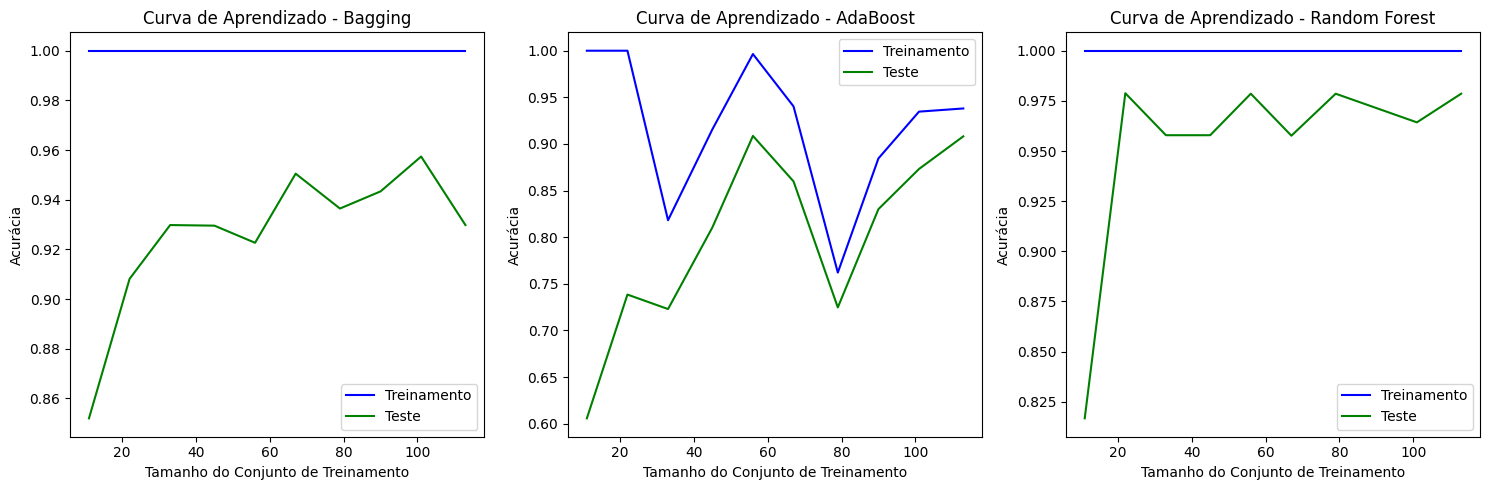

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Wine
wine = load_wine()
X = wine.data
y = wine.target

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 1. Modelo Bagging
# --------------------------
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Previsões e avaliação do modelo Bagging
y_pred_bagging = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Acurácia do Bagging: {bagging_accuracy:.4f}")

# --------------------------
# 2. Modelo AdaBoost (Boosting)
# --------------------------
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Previsões e avaliação do modelo AdaBoost
y_pred_adaboost = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"Acurácia do AdaBoost: {adaboost_accuracy:.4f}")

# --------------------------
# 3. Modelo Random Forest
# --------------------------
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões e avaliação do modelo Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {rf_accuracy:.4f}")

# --------------------------
# Curvas de Aprendizado
# --------------------------

# Curvas de aprendizado para Bagging
train_sizes_bagging, train_scores_bagging, test_scores_bagging = learning_curve(
    bagging_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Curvas de aprendizado para AdaBoost
train_sizes_adaboost, train_scores_adaboost, test_scores_adaboost = learning_curve(
    adaboost_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Curvas de aprendizado para Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# --------------------------
# Plotando as Curvas de Aprendizado
# --------------------------
plt.figure(figsize=(15, 5))

# Bagging
plt.subplot(1, 3, 1)
plt.plot(train_sizes_bagging, np.mean(train_scores_bagging, axis=1), label="Treinamento", color='blue')
plt.plot(train_sizes_bagging, np.mean(test_scores_bagging, axis=1), label="Teste", color='green')
plt.title("Curva de Aprendizado - Bagging")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend()

# AdaBoost
plt.subplot(1, 3, 2)
plt.plot(train_sizes_adaboost, np.mean(train_scores_adaboost, axis=1), label="Treinamento", color='blue')
plt.plot(train_sizes_adaboost, np.mean(test_scores_adaboost, axis=1), label="Teste", color='green')
plt.title("Curva de Aprendizado - AdaBoost")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend()

# Random Forest
plt.subplot(1, 3, 3)
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label="Treinamento", color='blue')
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label="Teste", color='green')
plt.title("Curva de Aprendizado - Random Forest")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend()

plt.tight_layout()
plt.show()
